## Датасет №1 (Использование мобильных устройств и поведение пользователей)
Ссылка: https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset

Проблемная область: прогнозирование пользовательского поведения и сегментация пользователей для улучшения работы приложений, оптимизации потребления энергии, анализа пользовательского опыта или рекламы.

Объекты наблюдения: пользователи мобильных устройств, чьи данные об использовании собираются и анализируются.

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df_mobiles = pd.read_csv(".//static//csv//user_behavior_dataset.csv")
print(df_mobiles.columns)
df_mobiles.info()
df_mobiles.head()

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    in

User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47  Female   
2                        32                  322   42    Male   
3                        56                  871   20    Male   
4                        58                  988   31  Female   

   User Behavior Class  
0                    4  
1                    3  
2                    2  
3                    3  
4                    3

Атрибуты объектов:
1. User ID — уникальный идентификатор пользователя.
2. Device Model — модель устройства.
3. Operating System — операционная система устройства.
4. App Usage Time (min/day) — время использования приложений в минутах в день.
5. Data Usage (MB/day) — время включенного экрана в часах в день.
6. Battery Drain (mAh/day) — потребление батареи в мАч в день.
7. Number of Apps Installed — количество установленных приложений.
8. Screen On Time (hours/day) — объем данных в мегабайтах в день.
9. Age — возраст пользователя.
10. Gender — пол пользователя.
11. User Behavior Class — класс поведения пользователя (категория для классификации).

Связи между объектами:
Атрибуты, такие как модель устройства, ОС и время использования приложений, могут быть связаны с классом поведения, представляя зависимости между действиями пользователя и его характеристиками.

Примеры бизнес-целей и эффекты для бизнеса:
1. Оптимизация энергопотребления устройств:
   - Бизнес-цель: Оптимизировать работу приложений для снижения расхода батареи, что увеличит время работы устройства и улучшит пользовательский опыт.
   - Эффект: Повышение удовлетворенности клиентов и снижение вероятности перехода на конкурентные приложения.

2. Сегментация пользователей для рекламы:
   - Бизнес-цель: Создание таргетированной рекламы на основе поведения пользователей (классы поведения).
   - Эффект: Увеличение конверсий и доходов от рекламных кампаний за счет более точной сегментации.

Примеры целей технического проекта:
1. Цель: Построение модели для прогнозирования расхода батареи.
   - Вход: Модель устройства, ОС, время использования приложений, количество приложений, возраст.
   - Целевой признак: Battery Drain (mAh/day).

2. Цель: Сегментация пользователей для рекламных кампаний.
   - Вход: Время использования приложений, возраст, пол, объем данных.
   - Целевой признак: User Behavior Class.

Проверка на пустые значения и дубликаты

In [196]:
null_values = df_mobiles.isnull().sum()
print("Пустые значения по столбцам:")
print(null_values)

duplicates = df_mobiles.duplicated().sum()
print(f"\nКоличество дубликатов: {duplicates}")

print("\nСтатистический обзор данных:")
df_mobiles.describe()

Пустые значения по столбцам:
User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

Количество дубликатов: 0

Статистический обзор данных:


User ID  App Usage Time (min/day)  Screen On Time (hours/day)  \
count  700.00000                700.000000                  700.000000   
mean   350.50000                271.128571                    5.272714   
std    202.21688                177.199484                    3.068584   
min      1.00000                 30.000000                    1.000000   
25%    175.75000                113.250000                    2.500000   
50%    350.50000                227.500000                    4.900000   
75%    525.25000                434.250000                    7.400000   
max    700.00000                598.000000                   12.000000   

       Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
count               700.000000                700.000000           700.000000   
mean               1525.158571                 50.681429           929.742857   
std                 819.136414                 26.943324           640.451729   
min                 302.000000                 10.000000           102.000000   
25%                 722.250000                 26.000000           373.000000   
50%                1502.500000                 49.000000           823.500000   
75%                2229.500000                 74.000000          1341.000000   
max                2993.000000                 99.000000          2497.000000   

              Age  User Behavior Class  
count  700.000000           700.000000  
mean    38.482857             2.990000  
std     12.012916             1.401476  
min     18.000000             1.000000  
25%     28.000000             2.000000  
50%     38.000000             3.000000  
75%     49.000000             4.000000  
max     59.000000             5.000000

Пустых значений и дубликатов нет, проверим на выбросы:

Количество выбросов в столбце 'App Usage Time (min/day)': 0
Количество выбросов в столбце 'Screen On Time (hours/day)': 0
Количество выбросов в столбце 'Battery Drain (mAh/day)': 0
Количество выбросов в столбце 'Number of Apps Installed': 0
Количество выбросов в столбце 'Data Usage (MB/day)': 0
Количество выбросов в столбце 'User Behavior Class': 0


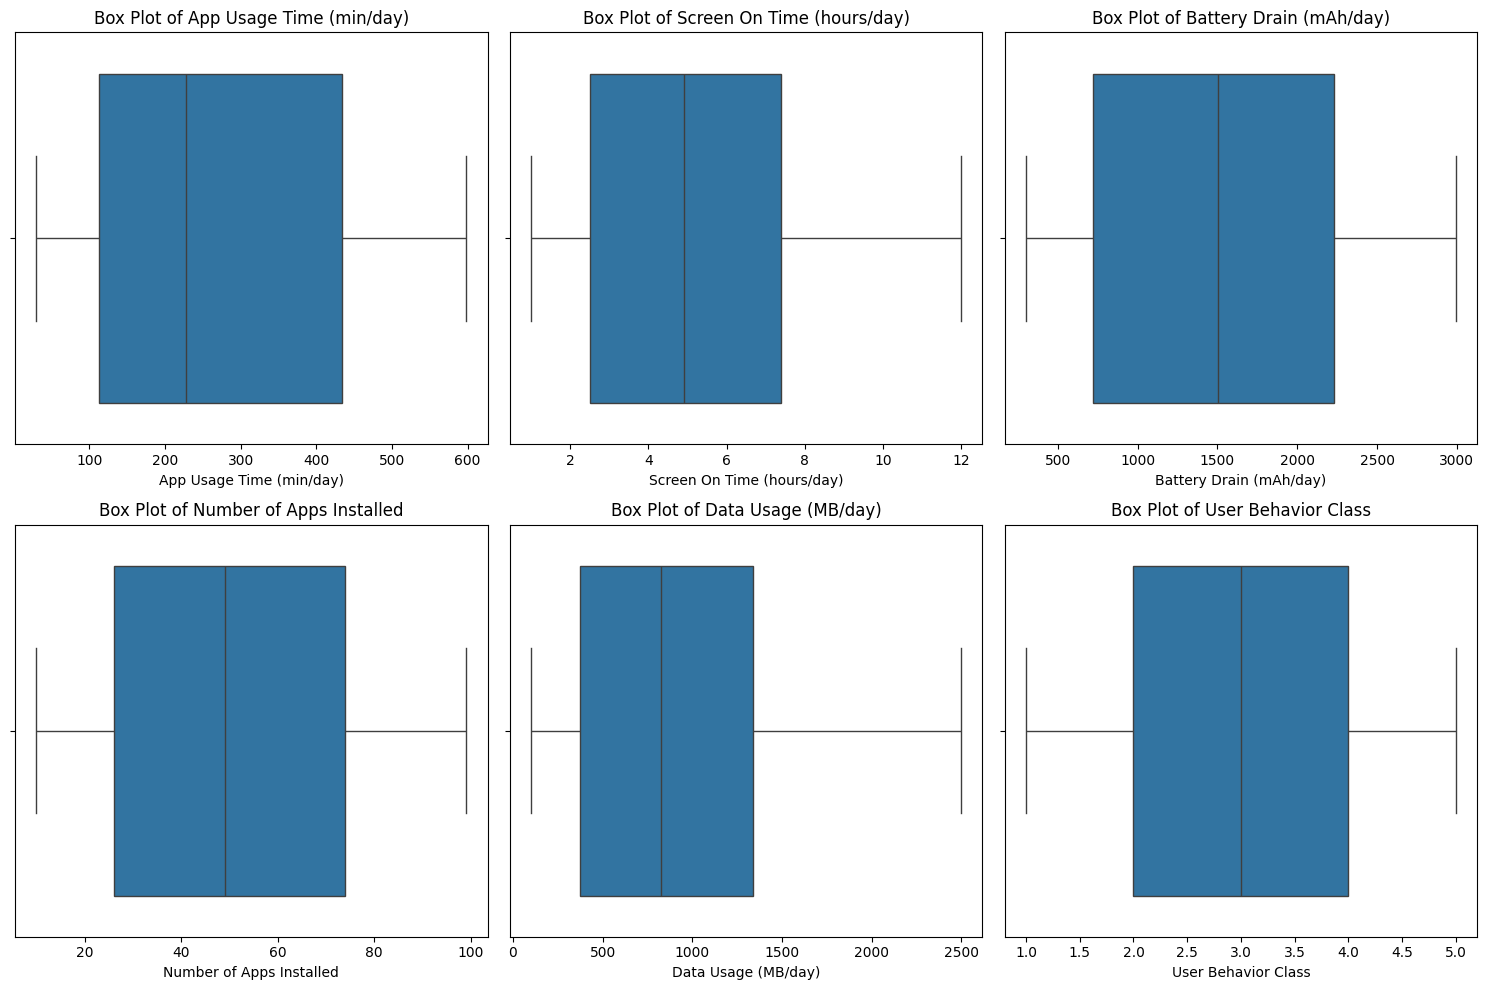

In [197]:
# Выбираем столбцы для анализа
columns_to_check = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)', 'User Behavior Class']

# Функция для подсчета выбросов
def count_outliers(data, columns):
    outliers_count = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    return outliers_count

# Подсчитываем выбросы
outliers_count = count_outliers(df_mobiles, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")

# Создаем диаграммы размахов
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_mobiles[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

Выбросов нет

Разбиение набора данных на обучающую, контрольную и тестовую выборки

In [198]:
train_df, test_df = train_test_split(df_mobiles, test_size=0.2, random_state=42)

train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

Размер обучающей выборки: 420
Размер контрольной выборки: 140
Размер тестовой выборки: 140


In [199]:
def check_balance(df, name):
    counts = df['User Behavior Class'].value_counts()
    print(f"Распределение \"Класс поведения пользователя\" в {name}:")
    print(counts)
    print()

check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")


Распределение "Класс поведения пользователя" в обучающей выборке:
User Behavior Class
2    88
5    88
4    86
3    84
1    74
Name: count, dtype: int64

Распределение "Класс поведения пользователя" в контрольной выборке:
User Behavior Class
1    35
2    29
4    26
5    25
3    25
Name: count, dtype: int64

Распределение "Класс поведения пользователя" в тестовой выборке:
User Behavior Class
3    34
2    29
4    27
1    27
5    23
Name: count, dtype: int64



Оверсемплинг и андерсемплинг

In [200]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

def oversample(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    oversampler = RandomOverSampler(random_state=42)
    x_resampled, y_resampled = oversampler.fit_resample(X, y) # type: ignore
    
    resampled_df = pd.concat([x_resampled, y_resampled], axis=1) 
    return resampled_df

def undersample(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    undersampler = RandomUnderSampler(random_state=42)
    x_resampled, y_resampled = undersampler.fit_resample(X, y) # type: ignore
    
    resampled_df = pd.concat([x_resampled, y_resampled], axis=1)
    return resampled_df

train_df_oversampled = oversample(train_df, 'User Behavior Class')
val_df_oversampled = oversample(val_df, 'User Behavior Class')
test_df_oversampled = oversample(test_df, 'User Behavior Class')

train_df_undersampled = undersample(train_df, 'User Behavior Class')
val_df_undersampled = undersample(val_df, 'User Behavior Class')
test_df_undersampled = undersample(test_df, 'User Behavior Class')

print("Оверсэмплинг:")
check_balance(train_df_oversampled, "обучающей выборке")
check_balance(val_df_oversampled, "контрольной выборке")
check_balance(test_df_oversampled, "тестовой выборке")

print("Андерсэмплинг:")
check_balance(train_df_undersampled, "обучающей выборке")
check_balance(val_df_undersampled, "контрольной выборке")
check_balance(test_df_undersampled, "тестовой выборке")

Оверсэмплинг:
Распределение "Класс поведения пользователя" в обучающей выборке:
User Behavior Class
1    88
2    88
5    88
4    88
3    88
Name: count, dtype: int64

Распределение "Класс поведения пользователя" в контрольной выборке:
User Behavior Class
5    35
3    35
1    35
2    35
4    35
Name: count, dtype: int64

Распределение "Класс поведения пользователя" в тестовой выборке:
User Behavior Class
4    34
1    34
2    34
3    34
5    34
Name: count, dtype: int64

Андерсэмплинг:
Распределение "Класс поведения пользователя" в обучающей выборке:
User Behavior Class
1    74
2    74
3    74
4    74
5    74
Name: count, dtype: int64

Распределение "Класс поведения пользователя" в контрольной выборке:
User Behavior Class
1    25
2    25
3    25
4    25
5    25
Name: count, dtype: int64

Распределение "Класс поведения пользователя" в тестовой выборке:
User Behavior Class
1    23
2    23
3    23
4    23
5    23
Name: count, dtype: int64



## Датасет №2 (Характеристики автомобиля: данные об экономии топлива)
Ссылка: https://www.kaggle.com/datasets/arslaan5/explore-car-performance-fuel-efficiency-data

Проблемная область: производительность и экономичность транспортных средств.

Объекты наблюдения: автомобили, представленные набором характеристик.

In [201]:
df_cars = pd.read_csv(".//static//csv//car_data.csv")
print(df_cars.columns)
df_cars.info()
df_cars.head()

Index(['city_mpg', 'class', 'combination_mpg', 'cylinders', 'displacement',
       'drive', 'fuel_type', 'highway_mpg', 'make', 'model', 'transmission',
       'year'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         550 non-null    int64  
 1   class            550 non-null    object 
 2   combination_mpg  550 non-null    int64  
 3   cylinders        548 non-null    float64
 4   displacement     548 non-null    float64
 5   drive            550 non-null    object 
 6   fuel_type        550 non-null    object 
 7   highway_mpg      550 non-null    int64  
 8   make             550 non-null    object 
 9   model            550 non-null    object 
 10  transmission     550 non-null    object 
 11  year             550 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 51.7+ 

city_mpg                        class  combination_mpg  cylinders  \
0        25                  midsize car               29        4.0   
1        26                  midsize car               30        4.0   
2        25  small sport utility vehicle               27        4.0   
3        26  small sport utility vehicle               29        4.0   
4        26  small sport utility vehicle               28        4.0   

   displacement drive fuel_type  highway_mpg   make     model transmission  \
0           2.5   fwd       gas           36  mazda         6            m   
1           2.5   fwd       gas           37  mazda         6            a   
2           2.5   fwd       gas           31  mazda  cx-5 2wd            a   
3           2.0   fwd       gas           34  mazda  cx-5 2wd            m   
4           2.0   fwd       gas           32  mazda  cx-5 2wd            a   

   year  
0  2014  
1  2014  
2  2014  
3  2014  
4  2014

Атрибуты объектов:

1. city_mpg — расход топлива в городе (миль на галлон).
2. class — класс автомобиля (например, седан среднего размера, малый внедорожник).
3. combination_mpg — комбинированный расход топлива (миль на галлон).
4. cylinders — количество цилиндров.
5. displacement — объем двигателя (в литрах).
6. drive — тип привода (например, передний, полный).
7. fuel_type — тип топлива (бензин, дизель и др.).
8. highway_mpg — расход топлива на шоссе (миль на галлон).
9. make — марка автомобиля.
10. model — модель автомобиля.
11. transmission — тип трансмиссии (автоматическая, механическая).
12. year — год выпуска автомобиля.

Связи между объектами:
Атрибуты, такие как объем двигателя, тип топлива, количество цилиндров и класс автомобиля, могут быть связаны с комбинированным расходом топлива (combination_mpg). Это позволяет выявлять зависимости между характеристиками автомобиля и его экономичностью.

Примеры бизнес-целей и эффекты для бизнеса:

1. Оптимизация ассортимента автомобилей:
   - Бизнес-цель: Анализировать топливную экономичность различных моделей для оптимизации ассортимента, предлагать более популярные и экономичные модели.
   - Эффект: Снижение затрат на производство низкоэффективных моделей и увеличение продаж популярных, экономичных автомобилей.

2. Снижение углеродного следа:
   - Бизнес-цель: Определение моделей с высоким расходом топлива для улучшения их эффективности и снижения выбросов.
   - Эффект: Соответствие экологическим стандартам, улучшение репутации компании и соблюдение требований законодательства.

Примеры целей технического проекта:

1. Цель: Создание модели для прогнозирования топливной эффективности.
   - Вход: Объем двигателя, тип топлива, количество цилиндров, класс, тип трансмиссии.
   - Целевой признак: combination_mpg.

2. Цель: Модель для предсказания углеродного следа автомобиля.
   - Вход: Тип топлива, объем двигателя, класс автомобиля, тип привода.
   - Целевой признак: combination_mpg.

Проверка на пустые значения и дубликаты

In [202]:
null_values = df_cars.isnull().sum()
print("Пустые значения по столбцам:")
print(null_values)

duplicates = df_cars.duplicated().sum()
print(f"\nКоличество дубликатов: {duplicates}")

print("\nСтатистический обзор данных:")
df_cars.describe()

Пустые значения по столбцам:
city_mpg           0
class              0
combination_mpg    0
cylinders          2
displacement       2
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64

Количество дубликатов: 2

Статистический обзор данных:


city_mpg  combination_mpg   cylinders  displacement  highway_mpg  \
count  550.000000       550.000000  548.000000    548.000000   550.000000   
mean    21.460000        24.069091    5.315693      2.931752    28.609091   
std      8.147392         7.478369    1.759999      1.248419     6.832228   
min     11.000000        14.000000    3.000000      1.200000    18.000000   
25%     17.000000        20.000000    4.000000      2.000000    24.000000   
50%     20.000000        23.000000    4.000000      2.500000    28.000000   
75%     24.000000        27.000000    6.000000      3.500000    32.000000   
max    126.000000       112.000000   12.000000      6.800000   102.000000   

              year  
count   550.000000  
mean   2019.000000  
std       3.165156  
min    2014.000000  
25%    2016.000000  
50%    2019.000000  
75%    2022.000000  
max    2024.000000

Видим, что есть пустые данные, и дубликаты, удаляем их:

In [203]:
df_cars = df_cars.drop_duplicates()

def drop_missing_values(dataframe, name):
    before_shape = dataframe.shape 
    cleaned_dataframe = dataframe.dropna()  
    after_shape = cleaned_dataframe.shape 
    print(f"В наборе данных '{name}' было удалено {before_shape[0] - after_shape[0]} строк с пустыми значениями.")
    return cleaned_dataframe

df_cars = drop_missing_values(df_cars, "Cars")

В наборе данных 'Cars' было удалено 2 строк с пустыми значениями.


Проверка на выбросы:

Количество выбросов в столбце 'combination_mpg': 8
Количество выбросов в столбце 'cylinders': 10
Количество выбросов в столбце 'displacement': 21
Количество выбросов в столбце 'highway_mpg': 3
Количество выбросов в столбце 'city_mpg': 9


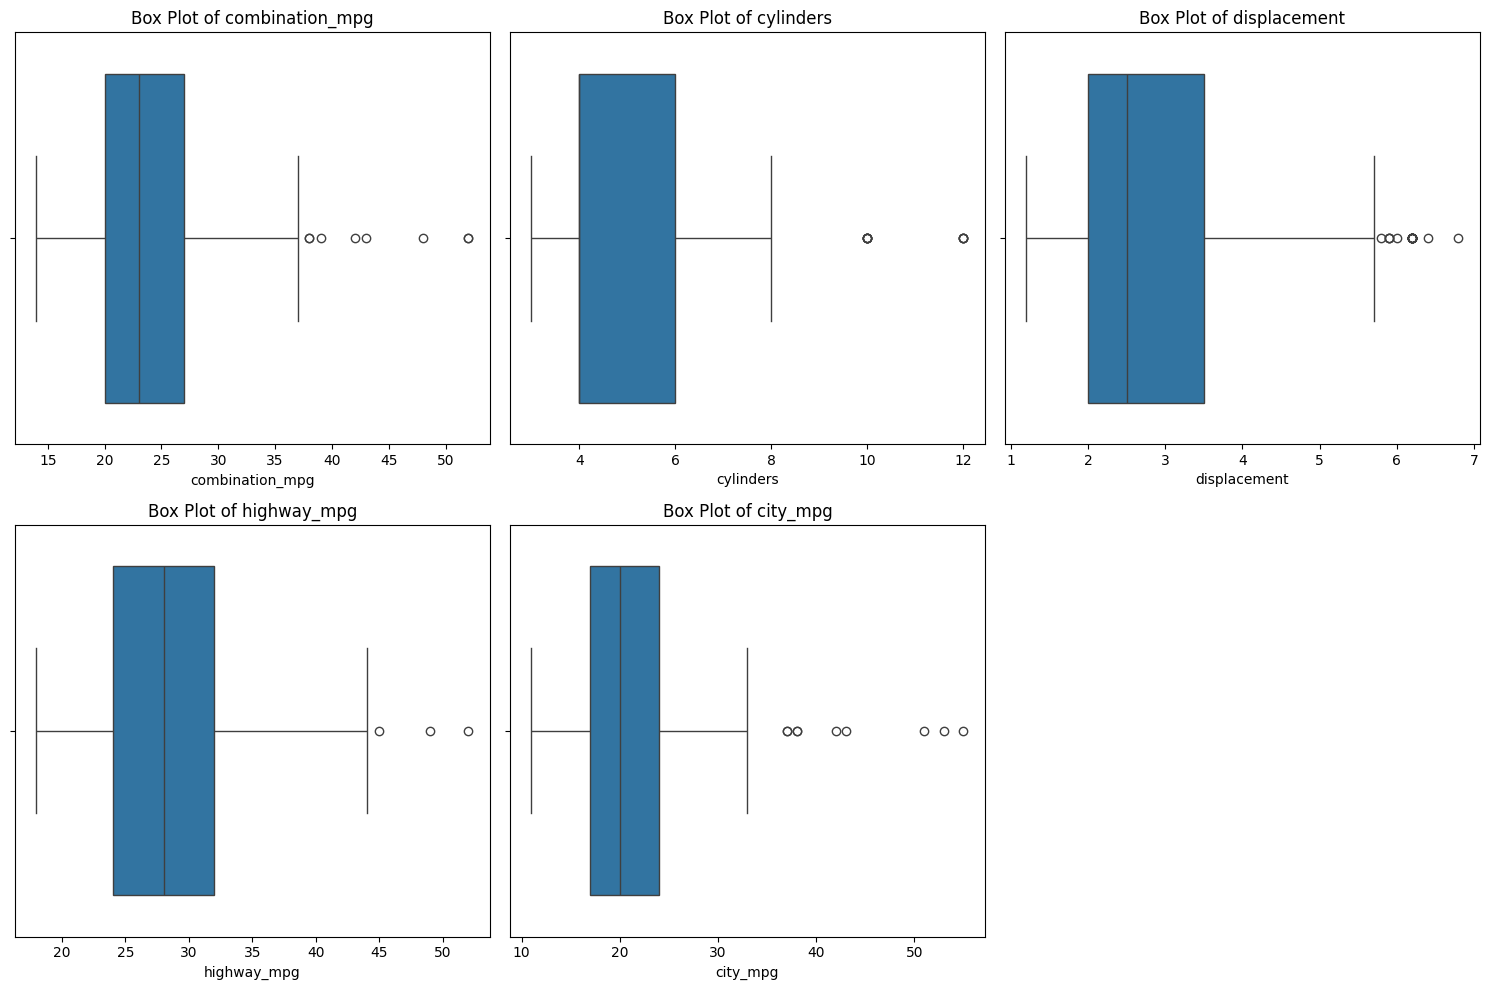

In [204]:
# Выбираем столбцы для анализа
columns_to_check = ['combination_mpg', 'cylinders', 'displacement', 'highway_mpg', 'city_mpg']

# Подсчитываем выбросы
outliers_count = count_outliers(df_cars, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")

# Создаем диаграммы размахов
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_cars[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

В каждом из выбранных столбцов присутствуют выбросы. Очистим их.

Количество удаленных строк: 36


<Figure size 1500x600 with 0 Axes>

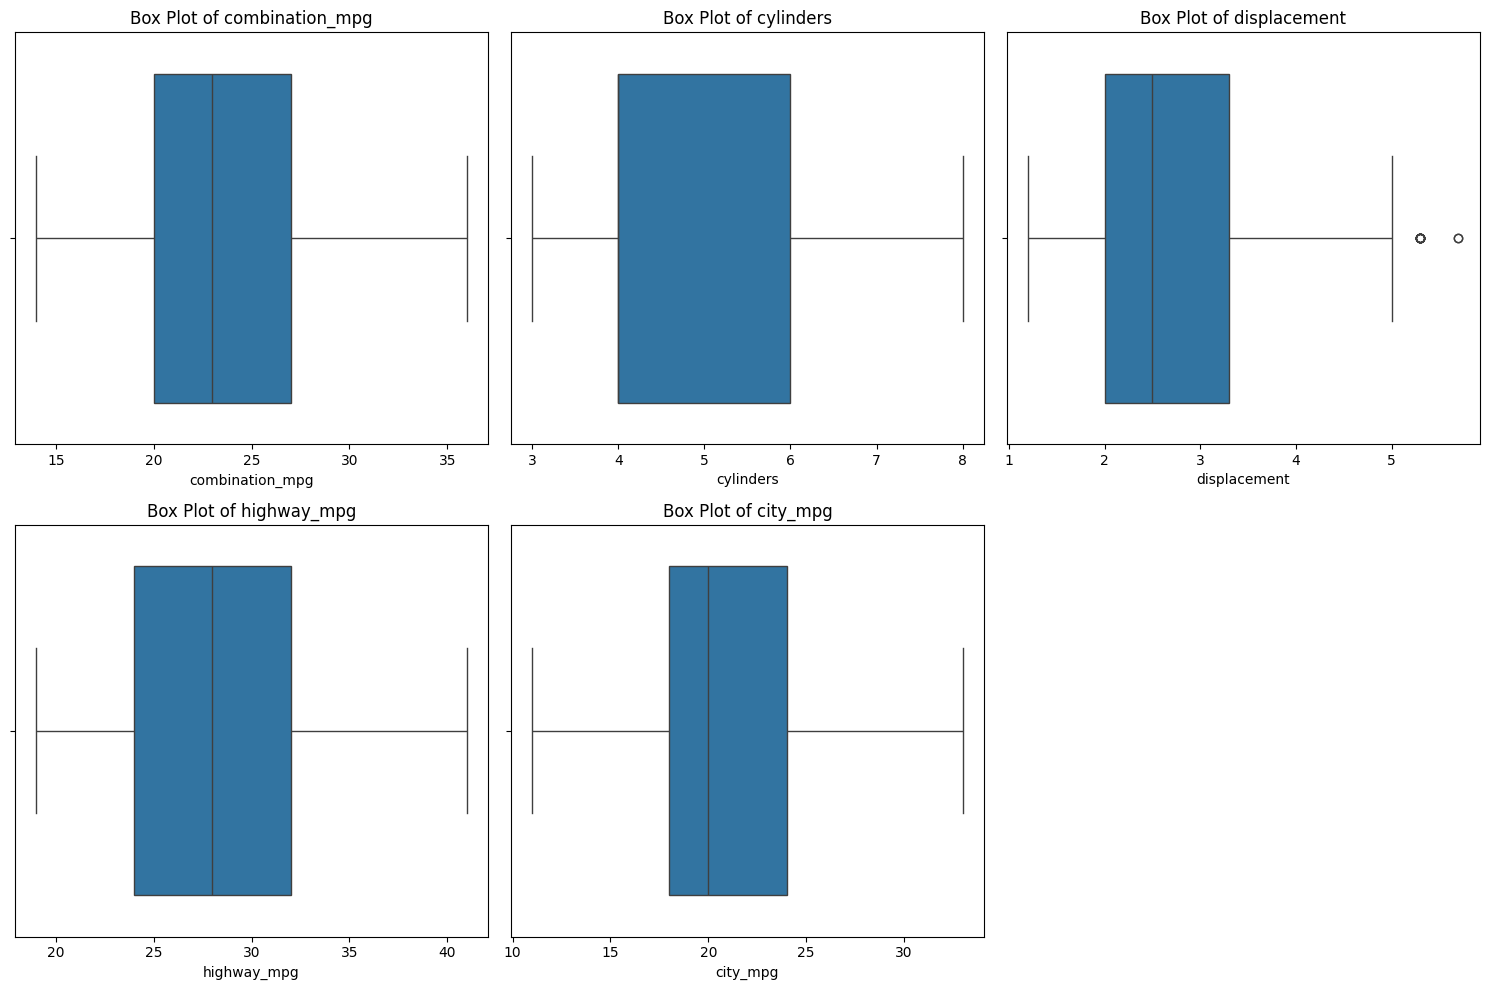

<Figure size 640x480 with 0 Axes>

In [205]:
# Выбираем столбцы для очистки
columns_to_clean = ['combination_mpg', 'cylinders', 'displacement', 'highway_mpg', 'city_mpg']

# Функция для удаления выбросов
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Удаляем строки, содержащие выбросы
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Удаляем выбросы
df_cars_clean = remove_outliers(df_cars, columns_to_clean)

# Выводим количество удаленных строк
print(f"Количество удаленных строк: {len(df_cars) - len(df_cars_clean)}")

# Создаем диаграммы размаха для очищенных данных
plt.figure(figsize=(15, 6))

# Создаем диаграммы размахов
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_clean, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_cars_clean[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

df_cars = df_cars_clean

Разбиение набора данных на обучающую, контрольную и тестовую выборки

In [206]:
train_df, test_df = train_test_split(df_cars, test_size=0.2, random_state=42)

train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

Размер обучающей выборки: 306
Размер контрольной выборки: 102
Размер тестовой выборки: 102


In [207]:
def check_balance(df, name):
    counts = df['combination_mpg'].value_counts()
    print(f"Распределение \"Комбинированный расход топлива\" в {name}:")
    print(counts)
    print()

check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")

Распределение "Комбинированный расход топлива" в обучающей выборке:
combination_mpg
23    32
22    29
24    23
25    22
27    22
18    21
19    19
29    18
21    18
26    17
31    16
28    14
20    13
32    12
17    11
30    10
16     3
34     3
36     1
33     1
14     1
Name: count, dtype: int64

Распределение "Комбинированный расход топлива" в контрольной выборке:
combination_mpg
20    17
19    15
21    13
26     9
27     7
22     6
30     5
23     5
18     4
17     3
24     3
28     3
29     3
25     2
34     2
33     2
32     1
14     1
31     1
Name: count, dtype: int64

Распределение "Комбинированный расход топлива" в тестовой выборке:
combination_mpg
21    14
18    13
22    12
27    12
23    10
31     5
20     5
26     5
24     4
29     4
28     4
19     4
25     3
32     3
17     3
30     1
Name: count, dtype: int64



Оверсемплинг и андерсемплинг

In [208]:
train_df_oversampled = oversample(train_df, 'combination_mpg')
val_df_oversampled = oversample(val_df, 'combination_mpg')
test_df_oversampled = oversample(test_df, 'combination_mpg')

train_df_undersampled = undersample(train_df, 'combination_mpg')
val_df_undersampled = undersample(val_df, 'combination_mpg')
test_df_undersampled = undersample(test_df, 'combination_mpg')

print("Оверсэмплинг:")
check_balance(train_df_oversampled, "обучающей выборке")
check_balance(val_df_oversampled, "контрольной выборке")
check_balance(test_df_oversampled, "тестовой выборке")

print("Андерсэмплинг:")
check_balance(train_df_undersampled, "обучающей выборке")
check_balance(val_df_undersampled, "контрольной выборке")
check_balance(test_df_undersampled, "тестовой выборке")

Оверсэмплинг:
Распределение "Комбинированный расход топлива" в обучающей выборке:
combination_mpg
21    32
22    32
25    32
19    32
29    32
23    32
28    32
18    32
27    32
20    32
16    32
30    32
32    32
31    32
24    32
26    32
17    32
36    32
34    32
33    32
14    32
Name: count, dtype: int64

Распределение "Комбинированный расход топлива" в контрольной выборке:
combination_mpg
20    17
19    17
17    17
27    17
22    17
26    17
24    17
32    17
21    17
18    17
30    17
23    17
29    17
28    17
34    17
25    17
14    17
33    17
31    17
Name: count, dtype: int64

Распределение "Комбинированный расход топлива" в тестовой выборке:
combination_mpg
28    14
32    14
30    14
23    14
20    14
26    14
21    14
18    14
27    14
25    14
22    14
19    14
29    14
24    14
31    14
17    14
Name: count, dtype: int64

Андерсэмплинг:
Распределение "Комбинированный расход топлива" в обучающей выборке:
combination_mpg
14    1
16    1
17    1
18    1
19    1
20    1
2

## Датасет №3 (Экономика стран)
Ссылка: https://www.kaggle.com/datasets/pratik453609/economic-data-9-countries-19802020

Проблемная область: экономический анализ и прогнозирование макроэкономических показателей.

Объекты наблюдения: экономические индексы по странам за определённые годы.

In [209]:
df_countries = pd.read_csv(".//static//csv//Economic Data - 9 Countries (1980-2020).csv")
print(df_countries.columns)
df_countries.info()
df_countries.head()

Index(['stock index', 'country', 'year', 'index price', 'log_indexprice',
       'inflationrate', 'oil prices', 'exchange_rate', 'gdppercent',
       'percapitaincome', 'unemploymentrate', 'manufacturingoutput',
       'tradebalance', 'USTreasury'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stock index          369 non-null    object 
 1   country              369 non-null    object 
 2   year                 369 non-null    float64
 3   index price          317 non-null    float64
 4   log_indexprice       369 non-null    float64
 5   inflationrate        326 non-null    float64
 6   oil prices           369 non-null    float64
 7   exchange_rate        367 non-null    float64
 8   gdppercent           350 non-null    float64
 9   percapitaincome      368 non-null    float64
 10  unemploymentrate  

stock index                   country    year  index price  log_indexprice  \
0      NASDAQ  United States of America  1980.0       168.61            2.23   
1      NASDAQ  United States of America  1981.0       203.15            2.31   
2      NASDAQ  United States of America  1982.0       188.98            2.28   
3      NASDAQ  United States of America  1983.0       285.43            2.46   
4      NASDAQ  United States of America  1984.0       248.89            2.40   

   inflationrate  oil prices  exchange_rate  gdppercent  percapitaincome  \
0           0.14       21.59            1.0        0.09          12575.0   
1           0.10       31.77            1.0        0.12          13976.0   
2           0.06       28.52            1.0        0.04          14434.0   
3           0.03       26.19            1.0        0.09          15544.0   
4           0.04       25.88            1.0        0.11          17121.0   

   unemploymentrate  manufacturingoutput  tradebalance  USTreasury  
0              0.07                  NaN        -13.06        0.11  
1              0.08                  NaN        -12.52        0.14  
2              0.10                  NaN        -19.97        0.13  
3              0.10                  NaN        -51.64        0.11  
4              0.08                  NaN       -102.73        0.12

Атрибуты объектов:
1. stock index — индекс акций.
2. country — страна.
3. year — год.
4. index price — цена индекса.
5. log_indexprice — логарифм цены индекса.
6. inflationrate — уровень инфляции.
7. oil prices — цены на нефть.
8. exchange_rate — валютный курс.
9. gdppercent — процент роста ВВП.
10. percapitaincome — доход на душу населения.
11. unemploymentrate — уровень безработицы.
12. manufacturingoutput — объём производства.
13. tradebalance — торговый баланс.
14. USTreasury — доходность казначейских облигаций США.

Связи между объектами:
Некоторые атрибуты могут быть связаны друг с другом, например, уровень инфляции и процент роста ВВП могут коррелировать с ценами на нефть, уровнем безработицы и торговым балансом.

Примеры бизнес-целей и эффект:
1. Прогнозирование экономического роста и планирование инвестиций:
   - Бизнес-цель: Создать модель прогнозирования роста экономики для стран, чтобы принять стратегические инвестиционные решения.
   - Эффект: Повышение точности экономических прогнозов и улучшение прибыльности инвестиционных стратегий.

2. Анализ и оптимизация торговой политики:
   - Бизнес-цель: Изучение влияния изменений торгового баланса и валютных курсов на экономику стран.
   - Эффект: Улучшение торговых соглашений и политики, что приведёт к более устойчивому экономическому росту.

Примеры целей технического проекта:
1. Цель: Построение модели для прогнозирования уровня инфляции.
   - Вход: Уровень безработицы, ВВП, доход на душу населения, валютный курс, цены на нефть.
   - Целевой признак: inflationrate.

2. Цель: Построение модели для оценки экономического роста.
   - Вход: Торговый баланс, доход на душу населения, валютный курс, инфляция.
   - Целевой признак: gdppercent.

Проверка на пустые значения и дубликаты

In [210]:
null_values = df_countries.isnull().sum()
print("Пустые значения по столбцам:")
print(null_values)

duplicates = df_countries.duplicated().sum()
print(f"\nКоличество дубликатов: {duplicates}")

print("\nСтатистический обзор данных:")
df_countries.describe()

Пустые значения по столбцам:
stock index             0
country                 0
year                    0
index price            52
log_indexprice          0
inflationrate          43
oil prices              0
exchange_rate           2
gdppercent             19
percapitaincome         1
unemploymentrate       21
manufacturingoutput    91
tradebalance            4
USTreasury              0
dtype: int64

Количество дубликатов: 0

Статистический обзор данных:


year   index price  log_indexprice  inflationrate  oil prices  \
count   369.000000    317.000000      369.000000     326.000000  369.000000   
mean   2000.000000   7898.648297        3.610542       0.041748   39.743171   
std      11.848225   7811.336862        0.482481       0.039579   25.452654   
min    1980.000000    168.610000        2.230000      -0.040000   11.350000   
25%    1990.000000   2407.100000        3.320000       0.020000   19.410000   
50%    2000.000000   5160.100000        3.600000       0.030000   28.520000   
75%    2010.000000  10279.500000        3.980000       0.057500   57.880000   
max    2020.000000  47751.330000        4.680000       0.240000   98.560000   

       exchange_rate  gdppercent  percapitaincome  unemploymentrate  \
count     367.000000  350.000000       368.000000        348.000000   
mean       27.897548    0.037114     20719.964674          0.068908   
std        49.620521    0.037850     17435.037783          0.043207   
min         0.900000   -0.110000        27.000000          0.020000   
25%         1.330000    0.020000      2090.250000          0.040000   
50%         5.440000    0.030000     19969.500000          0.060000   
75%        15.055000    0.060000     36384.000000          0.090000   
max       249.050000    0.150000     65280.000000          0.260000   

       manufacturingoutput  tradebalance  USTreasury  
count           278.000000    365.000000  369.000000  
mean            328.084820    -15.996384    0.059024  
std             622.395923    154.557170    0.033086  
min               0.590000   -770.930000    0.010000  
25%              80.380000    -25.370000    0.030000  
50%             188.160000     -0.140000    0.050000  
75%             271.977500     19.080000    0.080000  
max            3868.460000    366.140000    0.140000

Видим, что есть пустые данные, но нет дубликатов. Удаляем их

In [211]:
df_countries = drop_missing_values(df_countries, "Countries")

В наборе данных 'Countries' было удалено 150 строк с пустыми значениями.


Проверка на выбросы:

Количество выбросов в столбце 'year': 0
Количество выбросов в столбце 'index price': 17
Количество выбросов в столбце 'log_indexprice': 1
Количество выбросов в столбце 'inflationrate': 35
Количество выбросов в столбце 'oil prices': 0
Количество выбросов в столбце 'exchange_rate': 53
Количество выбросов в столбце 'gdppercent': 13
Количество выбросов в столбце 'percapitaincome': 0
Количество выбросов в столбце 'unemploymentrate': 9
Количество выбросов в столбце 'manufacturingoutput': 29
Количество выбросов в столбце 'tradebalance': 47
Количество выбросов в столбце 'USTreasury': 9


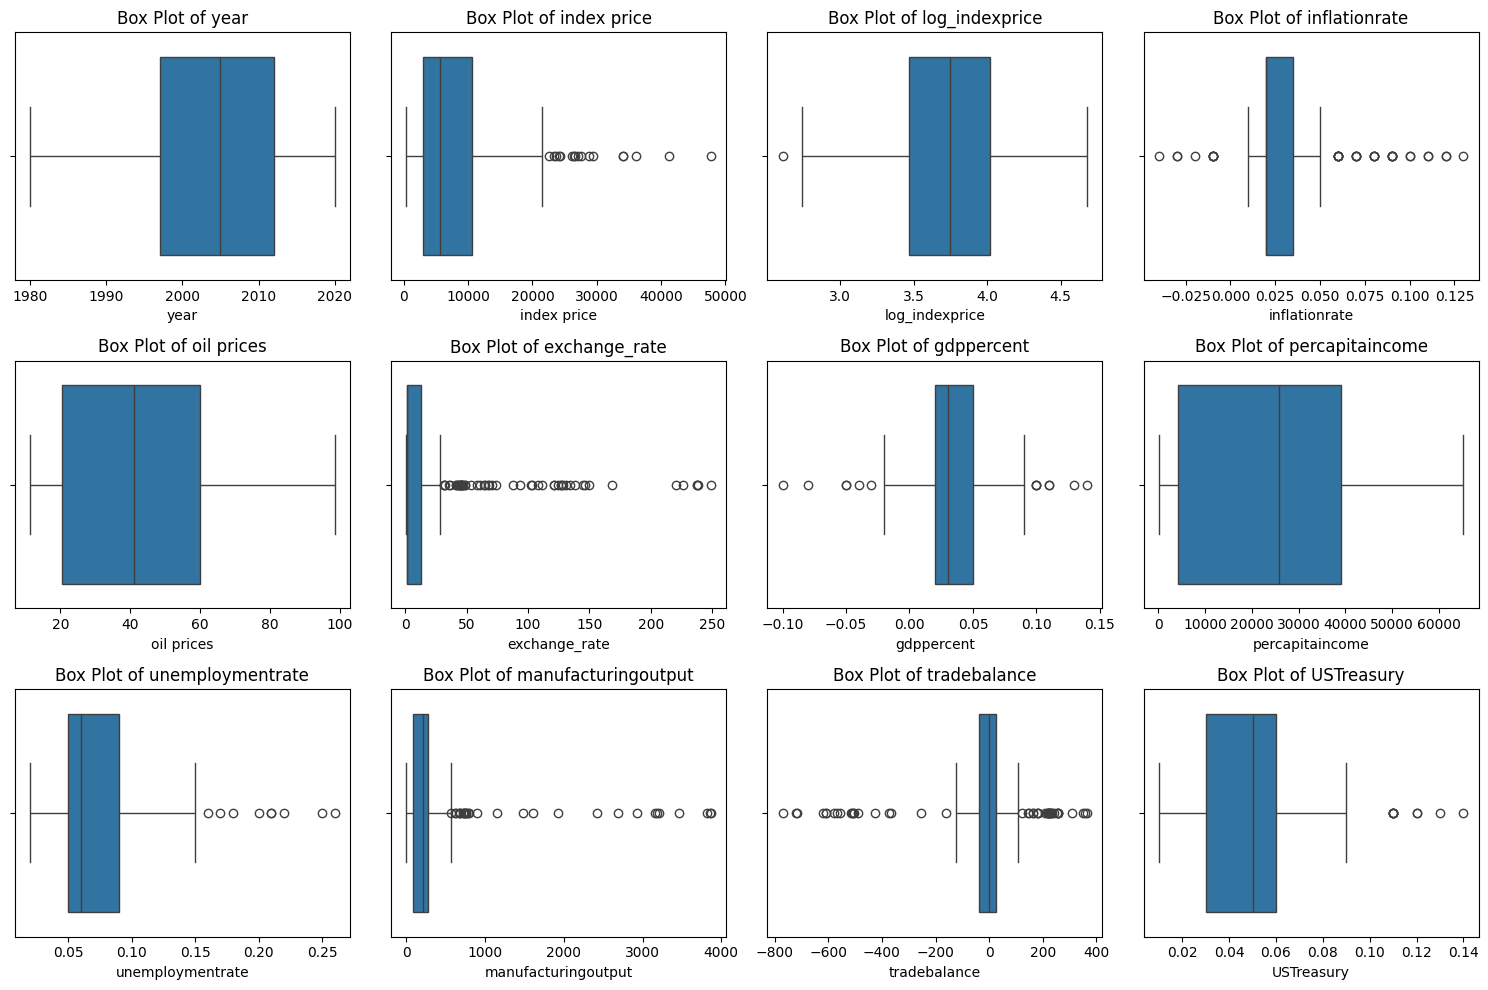

In [212]:
# Выбираем столбцы для анализа
columns_to_check = ['year', 'index price', 'log_indexprice',
       'inflationrate', 'oil prices', 'exchange_rate', 'gdppercent',
       'percapitaincome', 'unemploymentrate', 'manufacturingoutput',
       'tradebalance', 'USTreasury']

# Подсчитываем выбросы
outliers_count = count_outliers(df_countries, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")

# Создаем диаграммы размахов
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df_countries[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

В большинстве из выбранных столбцов присутствуют выбросы. Очистим их.

Количество удаленных строк: 136


<Figure size 1500x600 with 0 Axes>

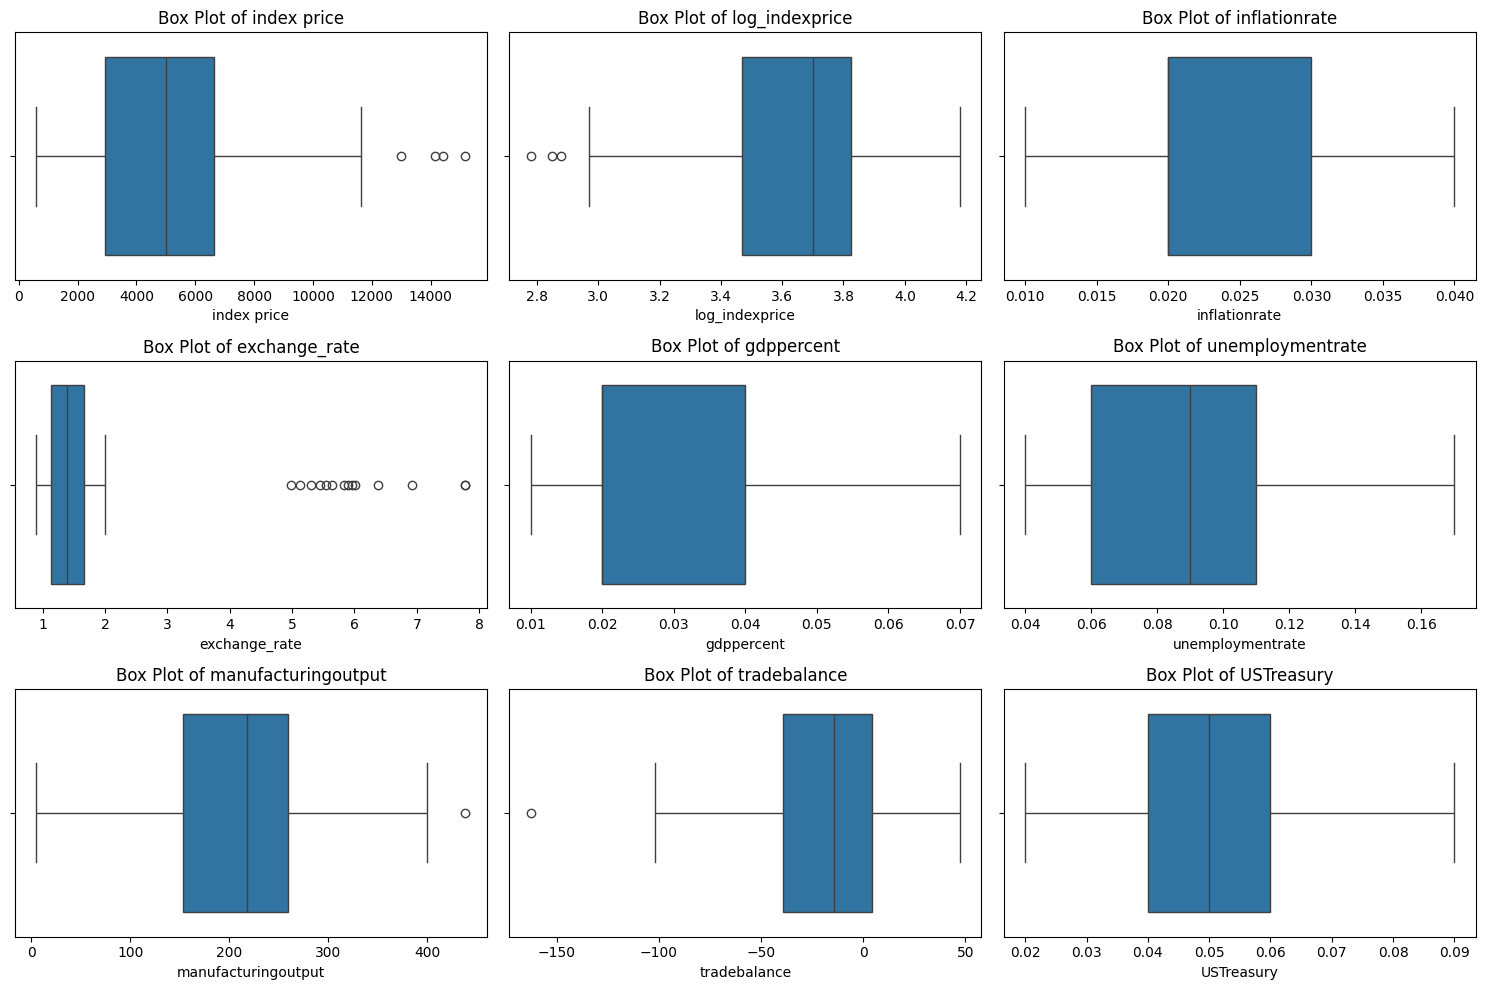

<Figure size 640x480 with 0 Axes>

In [213]:
# Выбираем столбцы для очистки
columns_to_clean = ['index price', 'log_indexprice',
       'inflationrate', 'exchange_rate', 'gdppercent', 'unemploymentrate', 'manufacturingoutput',
       'tradebalance', 'USTreasury']

# Удаляем выбросы
df_countries_clean = remove_outliers(df_countries, columns_to_clean)

# Выводим количество удаленных строк
print(f"Количество удаленных строк: {len(df_countries) - len(df_countries_clean)}")

# Создаем диаграммы размаха для очищенных данных
plt.figure(figsize=(15, 6))

# Создаем диаграммы размахов
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_clean, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_countries_clean[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

df_countries = df_countries_clean

Разбиение набора данных на обучающую, контрольную и тестовую выборки

In [214]:
train_df, test_df = train_test_split(df_countries, test_size=0.2, random_state=42)

train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

Размер обучающей выборки: 49
Размер контрольной выборки: 17
Размер тестовой выборки: 17


In [215]:
def check_balance(df, name):
    counts = df['inflationrate'].value_counts()
    print(f"Распределение \"Уровень инфляции\" в {name}:")
    print(counts)
    print()

check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")

Распределение "Уровень инфляции" в обучающей выборке:
inflationrate
0.02    25
0.03    11
0.01     9
0.04     4
Name: count, dtype: int64

Распределение "Уровень инфляции" в контрольной выборке:
inflationrate
0.03    6
0.01    6
0.02    5
Name: count, dtype: int64

Распределение "Уровень инфляции" в тестовой выборке:
inflationrate
0.02    6
0.03    6
0.01    4
0.04    1
Name: count, dtype: int64



Оверсемплинг и андерсемплинг

In [216]:
def binning(target, bins):
    return pd.qcut(target, q=bins, labels=False)

train_df['inflationrate_binned'] = binning(train_df['inflationrate'], bins=2)
val_df['inflationrate_binned'] = binning(val_df['inflationrate'], bins=2)
test_df['inflationrate_binned'] = binning(test_df['inflationrate'], bins=2)

train_df_oversampled = oversample(train_df, 'inflationrate_binned')
val_df_oversampled = oversample(val_df, 'inflationrate_binned')
test_df_oversampled = oversample(test_df, 'inflationrate_binned')

train_df_undersampled = undersample(train_df, 'inflationrate_binned')
val_df_undersampled = undersample(val_df, 'inflationrate_binned')
test_df_undersampled = undersample(test_df, 'inflationrate_binned')

print("Оверсэмплинг:")
check_balance(train_df_oversampled, "обучающей выборке")
check_balance(val_df_oversampled, "контрольной выборке")
check_balance(test_df_oversampled, "тестовой выборке")

print("Андерсэмплинг:")
check_balance(train_df_undersampled, "обучающей выборке")
check_balance(val_df_undersampled, "контрольной выборке")
check_balance(test_df_undersampled, "тестовой выборке")

Оверсэмплинг:
Распределение "Уровень инфляции" в обучающей выборке:
inflationrate
0.03    26
0.02    25
0.01     9
0.04     8
Name: count, dtype: int64

Распределение "Уровень инфляции" в контрольной выборке:
inflationrate
0.03    11
0.01     6
0.02     5
Name: count, dtype: int64

Распределение "Уровень инфляции" в тестовой выборке:
inflationrate
0.03    8
0.02    6
0.01    4
0.04    2
Name: count, dtype: int64

Андерсэмплинг:
Распределение "Уровень инфляции" в обучающей выборке:
inflationrate
0.03    11
0.02    10
0.01     5
0.04     4
Name: count, dtype: int64

Распределение "Уровень инфляции" в контрольной выборке:
inflationrate
0.03    6
0.01    4
0.02    2
Name: count, dtype: int64

Распределение "Уровень инфляции" в тестовой выборке:
inflationrate
0.03    6
0.02    5
0.01    2
0.04    1
Name: count, dtype: int64

